<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
<div hidden>
    $$
    \newcommand{\reals}{\mathbb{R}}
    \newcommand{\naturals}{\mathbb{N}}
    \newcommand{\integers}{\mathbb{Z}}
    \newcommand{\prob}{\mathbb{P}}
    \newcommand{\expect}{\mathbb{E}}
    \newcommand{\b}[1]{\mathbf{#1}}
    \newcommand{\bs}[1]{\boldsymbol{#1}}
    \newcommand{\c}[1]{\mathcal{#1}}
    \newcommand{mat}[2]{\left[\,\begin{array}{#1}#2\end{array}\,\right]}
    $$
</div>

# COMPSCI 371 Homework 1

_**Group Members:**_

### Problem 0 (3 points)

## Part 1: Problems in Machine Learning

### Problem 1.1

### Problem 1.2 (Exam Style)

### Problem 1.3 (Exam Style)

### Problem 1.4

In [1]:
import urllib.request
import ssl
from os import path as osp
import shutil


def retrieve(file_name, semester='fall24', homework=1):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        context = ssl._create_unverified_context()
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci371/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        with urllib.request.urlopen(url, context=context) as response:
            with open(file_name, 'wb') as file:
                shutil.copyfileobj(response, file)
        print('Downloaded file {}'.format(file_name))

In [4]:
import pickle

# retrieve is defined in a hidden cell
file_name = 'points.pkl'
retrieve(file_name)
with open(file_name, 'rb') as file:
    points = pickle.load(file)

sigma, min_size = 2, 5

Using previously downloaded file points.pkl


In [3]:
points[0]

array([-9.18107175,  4.43503692])

In [4]:
import numpy as np

def g(m, x, sig=2):
    return np.exp(-((np.linalg.norm(x - m)) ** 2) / (2 * (sig ** 2)))

In [5]:
def denominator(points, m, sig=2):
    d = []
    for x in points:
        d.append(g(m, x, sig))
    denominator = sum(d)
    return denominator

In [6]:
def step(m, t, sigma):
    
    numerator_sum = np.zeros_like(m)
    denom = denominator(t, m, sigma)
    
    for x in t:
        w_x = g(m, x, sigma) / denom
        numerator_sum += w_x * x
    
    return numerator_sum

In [7]:
def seek(m_old, t, sigma=2, max_iter=100):
    m_old = np.array(m_old)
    # print(m_old.shape)
    epoch = 0
    distance = np.inf  
    while epoch < max_iter and distance > sigma / 10:
        m_new = step(m_old, t, sigma)
        distance = np.linalg.norm(m_new - m_old)
        m_old = m_new
        epoch += 1
    return m_new     

In [8]:
 m_n_shape = seek(points[0], points, sigma)

In [13]:
def cluster(t, sigma=2, min_size=5):
    groups = {}
    
    for x in t:
        m_n = seek(x, t, sigma)
        m_n = tuple(m_n)
        
        sigma_radius = 0
        for mid_point in groups:
             if np.linalg.norm(np.array(m_n) - np.array(mid_point)) < sigma:
                
                new_center = tuple((np.array(mid_point) + np.array(m_n)) / 2)
                groups[new_center] = groups.pop(mid_point) 
                groups[new_center].append(x)
                sigma_radius = 1
                break
        
        if sigma_radius == 0:
            groups[m_n] = [x]
    
    nontrivial = {}
    for k, amt in groups.items():
        if len(amt) >= min_size:
            nontrivial[k] = amt
    
    return nontrivial

{(np.float64(-7.153104948406902), np.float64(-7.728195995521469)): [array([-7.73554447, -7.77566432]), array([-7.44016713, -8.79195851]), array([ -6.74924724, -10.17542932]), array([-7.40873586, -8.10963125]), array([-6.94306091, -7.0237442 ]), array([-6.83478745, -7.39121692]), array([-8.50899599, -8.65769397]), array([-6.87832079, -7.74317646]), array([-7.68488303, -7.45519607]), array([-7.28721033, -8.35398617]), array([-6.86658246, -8.03421946]), array([-7.8121371 , -5.34984488]), array([-6.90484511, -7.27705918]), array([-7.3710862 , -7.32525346]), array([-7.51201075, -6.9287204 ]), array([-6.64138783, -8.07588804]), array([-5.8659643 , -7.96807169])], (np.float64(-1.6692850949555202), np.float64(4.063185456482214)): [array([-0.55397084,  4.01338506]), array([-4.3223684 ,  5.30199347]), array([-2.34673261,  3.56128423]), array([-2.76017908,  5.55121358]), array([-2.35122066,  4.00973634]), array([-0.52579046,  3.3065986 ]), array([-1.78245013,  3.47072043]), array([-1.98197711,  4

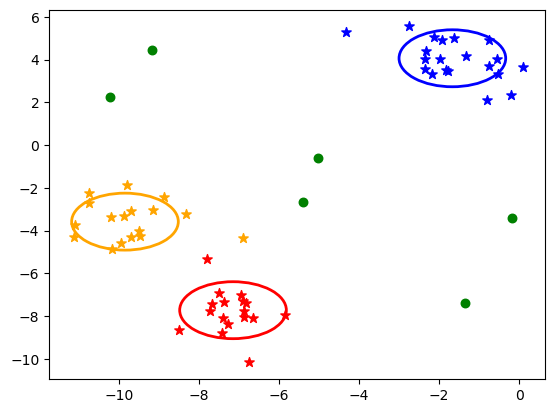

In [15]:
import matplotlib.pyplot as plt

clusters = cluster(points, sigma=1)
print(clusters)

def plot(t, clusters, sigma):
    amt = len(clusters)
    
    fig, ax = plt.subplots()
    colors = ['red', 'blue', 'orange']
    
    for x in t:
        c = 0
        for i, (middle, x_vals) in enumerate(clusters.items()):
            if any(np.array_equal(x, p) for p in x_vals):
                ax.scatter(x[0], x[1], color=colors[i % 3], marker='*', s=50)
                c = 1
                break
        
        if c == 0:
            ax.scatter(x[0], x[1], color='green', marker='.', s=150)
    
    for i, (middle, x_vals) in enumerate(clusters.items()):
        circle = plt.Circle((middle[0], middle[1]), sigma / 1.5, color=colors[i % 3], fill=False, linewidth=2)
        ax.add_patch(circle)
    
    plt.show()
    


plot(points, clusters, sigma=2)

## Part 2: Voronoi Diagrams

### Problem 2.1 (Exam Style)

### Problem 2.2 (Exam Style)

### Problem 2.3

## Part 3: Nearest-Neighbor Classification 

In [87]:
p = [0, 0]
q = [1, 0]
r = [0.3, 0.8]

#v = vertex(p, q, r)
l_pq, l_qr, l_rp = edge(p, q), edge(q, r), edge(r, p)

In [90]:
import numpy as np

def edge(p, q):
    p0, p1, q0, q1 = p[0], p[1], q[0], q[1]
    a0 = p0 - q0
    a1 = p1 - q1
    a2 = 0.5 * (q0*q0 + q1*q1 - p0*p0 - p1*p1)
    return [a0, a1, a2]

In [91]:
def vertex(p, q, r):
    x = edge(p, q)
    y = edge(q, r)
    # Solves the linear system formed by edges
    A = np.array([x[:2], y[:2]])
    b = [-x[2], -y[2]]
    return np.linalg.solve(A, b)

NameError: name 'v' is not defined

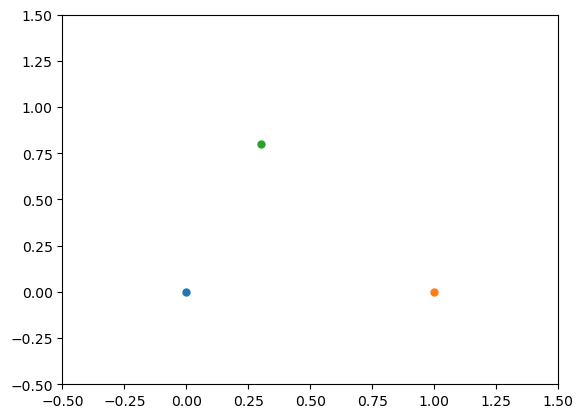

In [80]:
import matplotlib.pyplot as plot

def plot_line(a):
    if a[1] != 0:
        x_vals = np.linspace(-1, 2, 100)
        y_vals = - (a[0] * x_vals + a[2]) / a[1]
        plot.plot(x_vals, y_vals)
    else:
        plot.axvline(x=-a[2]/a[0])


plot.xlim(-0.5, 1.5)
plot.ylim(-0.5, 1.5)
plot.plot(p[0], p[1], '.', markersize=10)
plot.plot(q[0], q[1], '.', markersize=10)
plot.plot(r[0], r[1], '.', markersize=10)
plot.plot(v[0], v[1], '.', markersize=10)
plot_line(l_pq)
plot_line(l_qr)
plot_line(l_rp)
plot.axis('equal')
#plot.axis('off')

In [6]:
pumpkin_file_name = 'pumpkin.pkl'
retrieve(pumpkin_file_name)
with open(pumpkin_file_name, 'rb') as file:
    p = pickle.load(file)

Using previously downloaded file pumpkin.pkl


In [8]:
import numpy as np
p.train.x[0].size

12

In [10]:
def normalize(array=p.train.x):
    array = np.copy(array)
    for i in (range(array.shape[1])):
        mean_col = np.mean(array[:, i])
        std_col = np.std(array[:, i])
        array[:, i] = (array[:, i] - mean_col) / std_col
    return array



In [61]:
a = normalize(p.train.x)
print("Means after normalization:", np.mean(a, axis=0))
print("STD", np.std(a, axis=0))

Means after normalization: [ 2.42324679e-16  4.95307499e-16 -3.26257540e-16 -2.67785794e-16
 -1.34114941e-16  5.19732405e-16  4.01823019e-15 -2.83170206e-14
  6.66355859e-16  1.56543297e-15  5.02560956e-17 -9.68114477e-16]
STD [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [40]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [73]:
results = np.zeros((31, 3))

validate_norm = normalize(p.validate.x)
x_test = normalize(p.test.x)

for i in range(1, 32):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(a, p.train.y)

    # dont need to do this, .score() does this already
    # y_pred = neigh.predict(p.validate.x)
    val_acc = neigh.score(validate_norm, p.validate.y)
    test_acc = neigh.score(x_test, p.test.y)
    results[i - 1, 0] = i
    results[i - 1, 1] = val_acc
    results[i - 1, 2] = test_acc
    
    

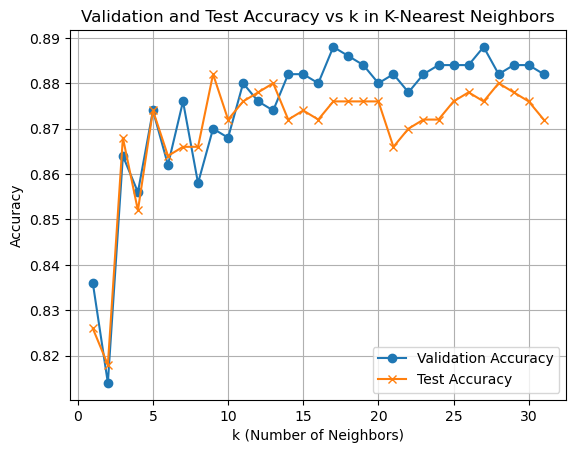

In [77]:
import matplotlib.pyplot as plt

plt.plot(results[:, 0], results[:, 1], label='Validation Accuracy', marker='o')  # Validation accuracy
plt.plot(results[:, 0], results[:, 2], label='Test Accuracy', marker='x')  # Test accuracy

# Add labels and title
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Validation and Test Accuracy vs k in K-Nearest Neighbors')

# Add grid and legend
plt.grid(True)
plt.legend()

# Show plot
plt.show()

### Problem 3.2: Validation

### Problem 3.3: Testing

### Problem 3.4: Analysis (Exam Style)